# **NBA Career Prediction**
**Predict 5-Year Career Longevity for NBA Rookies**

## WEEK 1 - Logistic Model

This notebook is using the datasets cleaned and seperated in "wenying_wu-14007025-week1_datapreparation.ipynb"

**The steps are:**
1. Prepare data
2. Training logistic model 
3. Plot AUC
4. Predict test dataset

## 1. Prepare Data

**[1.1]** Import all modules needed

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression as LR
from joblib import dump  
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import roc_curve,roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

**[1.2]** Load saved sets

In [2]:
X_train = np.load('../data/processed/X_train.npy')
y_train = np.load('../data/processed/y_train.npy')

X_val   = np.load('../data/processed/X_val.npy')
y_val   = np.load('../data/processed/y_val.npy')

test  = np.load('../data/processed/test.npy')

In [3]:
X_train.shape, X_val.shape

((6397, 15), (1600, 15))

## 2. Train LR Model

**[2.1]** Instantiate the LR class into a variable called rf then fit it

In [4]:
classifier = LR(class_weight='balanced')

In [5]:
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

**[2.2]** Save fitted model

In [6]:
dump(classifier,  '../models/LR_default.joblib')

['../models/LR_default.joblib']

**[2.3]** Save the predictions from this model for the training and validation sets into 2 variables called y_train_preds and y_val_preds

In [7]:
y_train_preds = classifier.predict(X_train)
y_val_preds = classifier.predict(X_val)

In [8]:
y_train_preds_probs=classifier.predict_proba(X_train)
y_val_preds_probs=classifier.predict_proba(X_val)

**[2.4]** Display the model scores of this model on the training set

In [9]:
print(f'RMSE: {mse(y_train, y_train_preds_probs[:,1], squared=False)}')
print(f'MAE: {mae(y_train, y_train_preds_probs[:,1])}')
print(f'precision: {precision_score(y_train, y_train_preds)}')
print(f'recall: {recall_score(y_train, y_train_preds)}')
print(f'accuracy: {accuracy_score(y_train, y_train_preds)}')
print(f'f1: {f1_score(y_train, y_train_preds)}')
print(f'roc_auc_score: {roc_auc_score(y_train, y_train_preds_probs[:,1])}')

RMSE: 0.46583255088780057
MAE: 0.4308293933075174
precision: 0.9060331019754405
recall: 0.6364147759234953
accuracy: 0.6418633734563076
f1: 0.7476594338583544
roc_auc_score: 0.7125462963615677


**[2.5]** Display the model scores of this model on the validation set

In [10]:
print(f'RMSE: {mse(y_val, y_val_preds_probs[:,1], squared=False)}')
print(f'MAE: {mae(y_val, y_val_preds_probs[:,1])}')
print(f'precision: {precision_score(y_val, y_val_preds)}')
print(f'recall: {recall_score(y_val, y_val_preds)}')
print(f'accuracy: {accuracy_score(y_val, y_val_preds)}')
print(f'f1: {f1_score(y_val, y_val_preds)}')
print(f'roc_auc_score: {roc_auc_score(y_val, y_val_preds_probs[:,1])}')

RMSE: 0.4713445146662774
MAE: 0.43594618483251857
precision: 0.8928571428571429
recall: 0.6371814092953523
accuracy: 0.63375
f1: 0.7436570428696414
roc_auc_score: 0.6745386705143669


## 3. Plot AUC

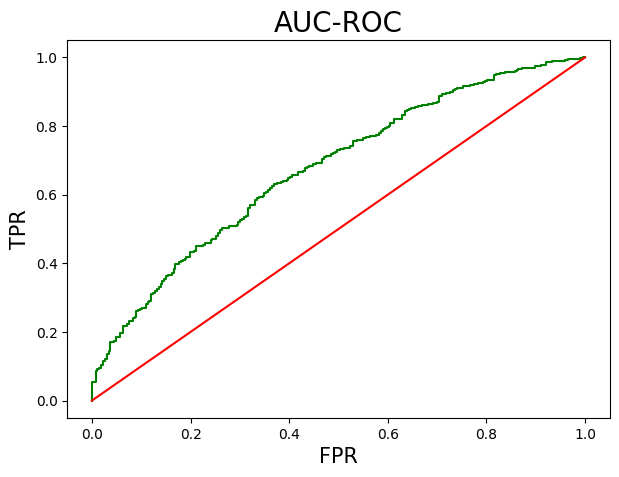

0.6745386705143669

In [11]:
fpr,tpr,threshold=roc_curve(y_val,y_val_preds_probs[:,1])
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr,color='green')
plt.plot([0,1],[0,1],label='baseline',color='red')
plt.xlabel('FPR',fontsize=15)
plt.ylabel('TPR',fontsize=15)
plt.title('AUC-ROC',fontsize=20)
plt.show()
roc_auc_score(y_val,y_val_preds_probs[:,1])

## 4. Predict & save test set data

In [12]:
predict = classifier.predict_proba(test)[:,1]
X_test = pd.read_csv("../data/raw/test.csv")
result = pd.DataFrame(data = {'Id': X_test.loc[:,'Id'], 'TARGET_5Yrs': predict})
result.to_csv("../data/external/test_wenying_LR_v3.csv", index = False)